# Setup

In [1]:
# Set Up Environment
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.ndimage import gaussian_filter
from kaggle_environments import evaluate, make
from kaggle_environments.envs.halite.helpers import *
%matplotlib inline
env = make("halite", configuration={ "episodeSteps": 400 }, debug=True)
print (env.configuration)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
# automatically reimport when file has changed NOT working 
%load_ext autoreload
%autoreload 2
# Monekypatch coordinates system (will break rest of simulation)
#Point.to_index = lambda self, size: self.y * size + self.x
#Point.from_index = lambda index, size: Point(*divmod(index, size))

{'episodeSteps': 400, 'agentExec': 'LOCAL', 'agentTimeout': 12, 'actTimeout': 6, 'runTimeout': 9600, 'startingHalite': 24000, 'size': 21, 'spawnCost': 500, 'convertCost': 500, 'moveCost': 0, 'collectRate': 0.25, 'regenRate': 0.02, 'maxCellHalite': 500}


# Import agent

In [27]:
from submission import agent, internals

# Step by step debug

In [3]:
# reset game
trainer = env.train([None, "random"])
observation = trainer.reset()
my_action = agent(observation, env.configuration)

In [9]:
# action
my_action = agent(observation, env.configuration)
board = Board(observation, env.configuration)
obs = Observation(observation)
print("orders: ", internals().orders)
print("action :", my_action)

orders:  {}
action : {}


In [16]:
# step
observation, reward, done, info = trainer.step(my_action)
env.render(mode="ipython", header=True, controls=True, width=550, height=500)

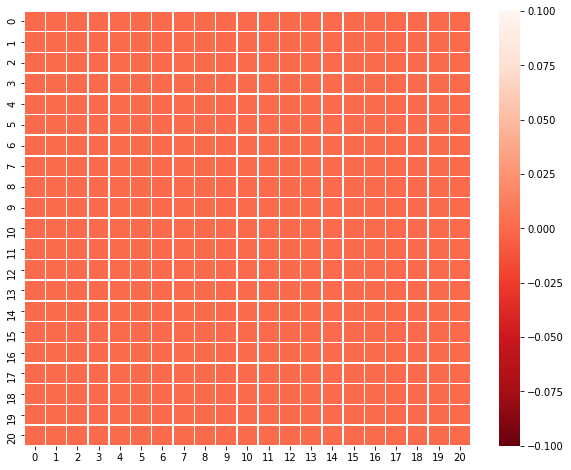

In [25]:
sns.heatmap(internals().threat_map, cmap='Reds_r', linewidths=0.5, annot=False)
#sns.heatmap(internals().halite_map, cmap='Blues', linewidths=0.5, annot=False)
#sns.heatmap(internals().reward_map, cmap='RdYlGn', linewidths=0.5, annot=False)
#pd.DataFrame(internals().threat_map).style.background_gradient(cmap='Reds_r').format('{:03,.0f}')

In [28]:
internals().threat_map

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.,

# Run a game

In [ ]:
env.run(["submission.py", "random","random","random"])
env.render(mode="ipython", width=800, height=600)